# <center> 프로그래밍3 데이터 분석 <center/>

## <center> 서울 지하철 첫차 승차인원  </center>

####      <div style="text-align:right">산업데이터사이언스학부 </div> <br>
<div style="text-align:right">2201704236 인진영 </div>

### 지하철 첫차 승차인원을 서울에 있는 역으로 어떤 역이 첫차를 승차하는 인원이 많은지 찾아봤다
http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-12921&srvType=F&serviceKind=1&currentPageNo=1

In [11]:
import pandas as pd
import numpy as np

In [12]:
train = pd.read_csv('지하철.csv', encoding = 'euc-kr' )
train.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202104,1호선,동대문,635,9,12446,1948,8958,7019,14035,...,8304,14,1286,1,2,0,0,0,0,20210503
1,202104,1호선,동묘앞,57,3,2966,885,3409,4736,5917,...,2344,3,1198,0,0,0,0,0,0,20210503
2,202104,1호선,서울역,746,16,9151,6038,11560,33958,36079,...,7638,13,570,0,0,0,0,0,0,20210503
3,202104,1호선,시청,29,0,1711,3796,2774,19145,6323,...,1308,5,86,0,0,0,0,0,0,20210503
4,202104,1호선,신설동,270,10,8305,3003,7977,10434,17091,...,5136,9,294,0,0,0,0,0,0,20210503


In [13]:
train = (train.rename(columns={
    '04시-05시 승차인원':'첫차',
    '03시-04시 하차인원':'막차'}))
train

,사용월,호선명,지하철역,첫차,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,막차,작업일자
0,202104,1호선,동대문,635,9,12446,1948,8958,7019,14035,...,8304,14,1286,1,2,0,0,0,0,20210503
1,202104,1호선,동묘앞,57,3,2966,885,3409,4736,5917,...,2344,3,1198,0,0,0,0,0,0,20210503
2,202104,1호선,서울역,746,16,9151,6038,11560,33958,36079,...,7638,13,570,0,0,0,0,0,0,20210503
3,202104,1호선,시청,29,0,1711,3796,2774,19145,6323,...,1308,5,86,0,0,0,0,0,0,20210503
4,202104,1호선,신설동,270,10,8305,3003,7977,10434,17091,...,5136,9,294,0,0,0,0,0,0,20210503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44117,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
44118,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
44119,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
44120,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223


In [14]:
train_2020 = train.사용월.between(2020_01,2020_12)

In [15]:
cols= ['사용월','지하철역','첫차']

In [16]:
tra_20 = train.loc[train_2020,cols]
tra_20

,사용월,지하철역,첫차
2423,202012,동대문,692
2424,202012,동묘앞,102
2425,202012,서울역,581
2426,202012,시청,24
2427,202012,신설동,316
...,...,...,...
9614,202001,원덕,28
9615,202001,중랑,144
9616,202001,지평,0
9617,202001,팔당,1


---

# 데이터 시각화

In [43]:
import matplotlib.pyplot as plt

In [44]:
train.select_dtypes(object).columns

Index(['호선명', '지하철역'], dtype='object')

In [45]:
train.지하철역.nunique()

578

In [46]:
train.지하철역.value_counts()

서울역            419
공덕             319
김포공항           265
홍대입구           245
디지털미디어시티       241
              ... 
어천               8
오목천              8
하남시청(덕풍?신장)      2
강일               2
하남검단산            2
Name: 지하철역, Length: 578, dtype: int64

In [47]:
train.지하철역.isna().sum()

0

In [48]:
top_n = train.지하철역.value_counts().index[:6]

In [49]:
top_n

Index(['서울역', '공덕', '김포공항', '홍대입구', '디지털미디어시티', '고속터미널'], dtype='object')

In [50]:
plt.rcParams['font.family'] = 'Malgun Gothic'

<AxesSubplot:>

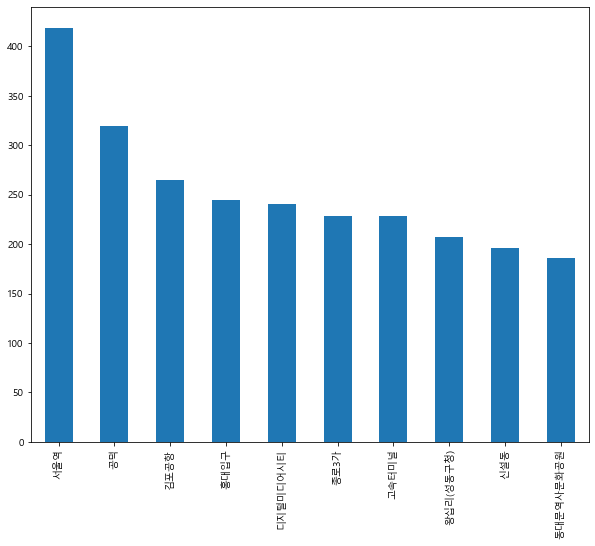

In [51]:
fig, ax = plt.subplots(figsize=(10, 8))
top_n = train.지하철역.value_counts().index[:10]
(
 train.assign(
 지하철역=train.지하철역.where(
 train.지하철역.isin(top_n), 'Other'))
 .지하철역.value_counts()[1:]
 .plot.bar(ax=ax)
)

In [52]:
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='지하철역'>

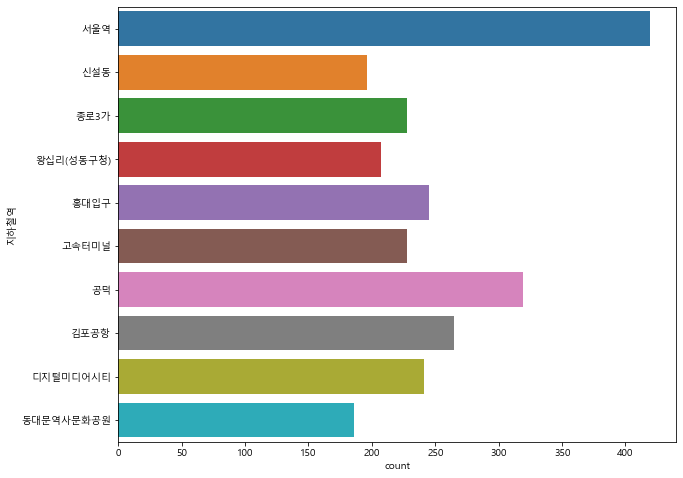

In [53]:
fig, ax = plt.subplots(figsize=(10, 8))
top_n = train.지하철역.value_counts().index[:10]
sns.countplot(y='지하철역',
 data=(train.assign(
 지하철역=train.지하철역.where(train.지하철역.isin(top_n)))
 )
 )

### 이로써 서울역이 첫차에 가장많은 인원이 승차를 한다는 것을 알 수 있게 됐습니다.